# Proyecto de Machine Learning de petroleo y gas


- **Problem Statement** : To Develop a Regression Model that takes Operational parameters as inputs and provides Oil-Production Rates as Outputs.

## Importo librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Divyanshu-ISM/Machine-Learning-Deep-Learning/main/Volve%20P-12_DatesCorrected.csv',
                 index_col=0, parse_dates = True)

In [3]:
df.head()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

## Seleccionamos las columnas con los inputs y los outputs

- para correlaciones muy bajas o muy altas las megnitudes necesitas ser evitadas

In [5]:
output_col = 'BORE_OIL_VOL'

<AxesSubplot:>

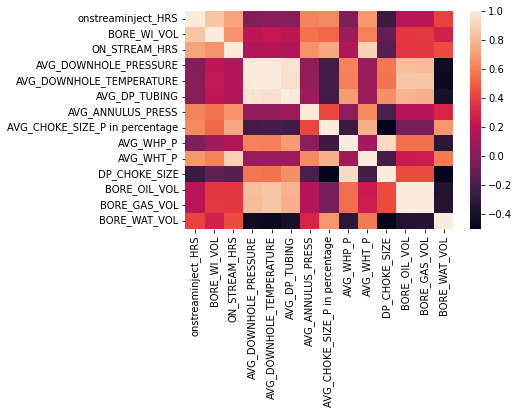

In [6]:
sns.heatmap(df.corr())

^ Can see from above matrix that some features are fairly inter-related, which breaks the assumption of LinReg, and hence we might see troubles in model performance.

However, let's go with it for now. Let's fail and learn

<AxesSubplot:>

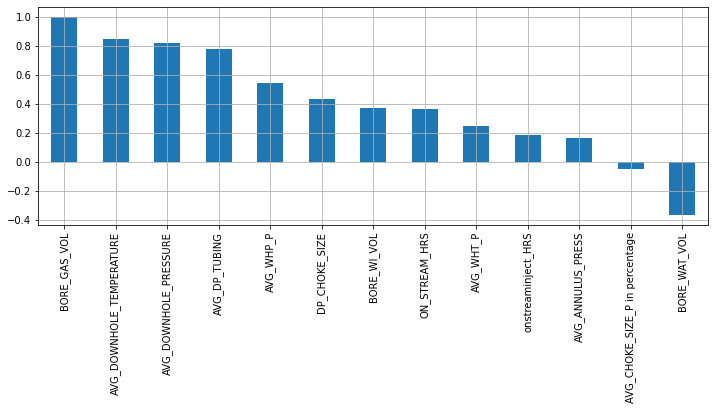

In [7]:
df.corr()[output_col].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(12,4), grid=True)

In [8]:
corr_df = pd.DataFrame(df.corr()[output_col].sort_values(ascending=False)[1:])
corr_df.columns=['Corr']

In [9]:
corr_df

,Corr
BORE_GAS_VOL,0.998661
AVG_DOWNHOLE_TEMPERATURE,0.850241
AVG_DOWNHOLE_PRESSURE,0.819920
AVG_DP_TUBING,0.778941
AVG_WHP_P,0.544204
DP_CHOKE_SIZE,0.434375
BORE_WI_VOL,0.368739
ON_STREAM_HRS,0.361124
AVG_WHT_P,0.245750
onstreaminject_HRS,0.182405


In [10]:
input_columns = corr_df[(abs(corr_df['Corr'])>0.2) & (corr_df['Corr']<0.90)].index
input_columns

Index(['AVG_DOWNHOLE_TEMPERATURE', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING',
       'AVG_WHP_P', 'DP_CHOKE_SIZE', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_WHT_P', 'BORE_WAT_VOL'],
      dtype='object')

### Input Columns : Selecting features with good (but not extreme) correlations with output variables.

In [11]:
input_columns

Index(['AVG_DOWNHOLE_TEMPERATURE', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING',
       'AVG_WHP_P', 'DP_CHOKE_SIZE', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_WHT_P', 'BORE_WAT_VOL'],
      dtype='object')

## Name Input matrix as X (Feature Matrix) and Output matrix as y (target).

In [12]:
X = df[input_columns] 
y = df[output_col]

X.shape , y.shape

((3291, 9), (3291,))

## Train-Test (or Validation) Split.

- In Time series Projects, we cannot do a shuffle/permutation based split. We need to maintain the sequence.

- Here, I am keeping last 291 days as Testing or Validation set.

In [13]:
train_length = 3000 #days

X_train , y_train = X.iloc[:train_length,:] , y[:train_length]

X_test , y_test = X.iloc[train_length:, :] , y[train_length:]

In [14]:
X_train.shape , X_test.shape

((3000, 9), (291, 9))

## Feature Scaling. Important for better Training (in select models).

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [16]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## Training A Machine Learning model. (Select the best of them all).

### Option 1 : Multiple Linear Regression Model.

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled , y_train)

LinearRegression()

In [18]:
yp_train = lm.predict(X_train_scaled)

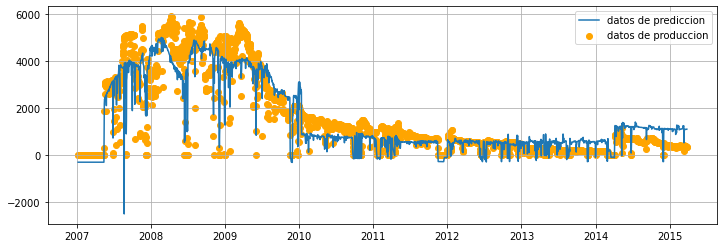

In [21]:
plt.figure(figsize=(12,4))

plt.scatter(df.index[:train_length] , y_train, color='orange', label = "datos de produccion")
plt.plot(df.index[:train_length] , yp_train, label = "datos de prediccion")
plt.legend()
plt.grid()

In [22]:
yp_test = lm.predict(X_test_scaled)

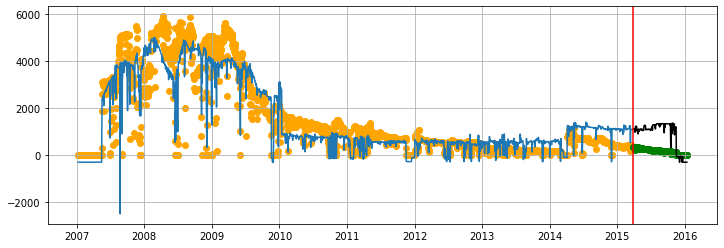

In [23]:
plt.figure(figsize=(12,4))

plt.scatter(df.index[:train_length] , y_train, color='orange')
plt.plot(df.index[:train_length] , yp_train)

plt.scatter(df.index[train_length:] , y_test, color='green')
plt.plot(df.index[train_length:] , yp_test, color='black')


plt.axvline(df.index[train_length], color='red')


plt.grid()

### RandomForest Regressor Model

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

yp_train = rf.predict(X_train)

yp_test = rf.predict(X_test)

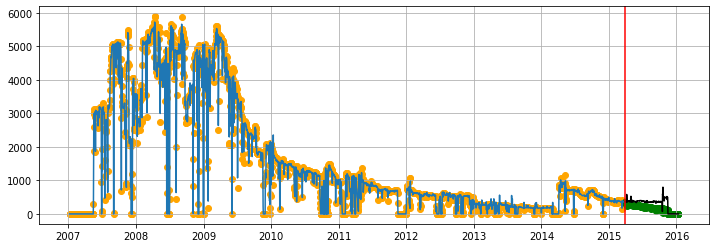

In [29]:
plt.figure(figsize=(12,4))

plt.scatter(df.index[:train_length] , y_train, color='orange')
plt.plot(df.index[:train_length] , yp_train)

plt.scatter(df.index[train_length:] , y_test, color='green')
plt.plot(df.index[train_length:] , yp_test, color='black')


plt.axvline(df.index[train_length], color='red')


plt.grid()

In [32]:
## Resample it to monthly and then repeat the entire process.
## Better performance expected since much of the data will be smoothened with lesser operational noises, 
## and hence can train a better model.

